# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 8</font>



## Based on the DSA course: github.com/dsacademybr

In [1]:
## Seaborn for plotting

In [2]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

In [3]:
# Carregando um dos datasets que vem com o Seaborn
dados = sea.load_dataset("tips")

In [4]:
dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


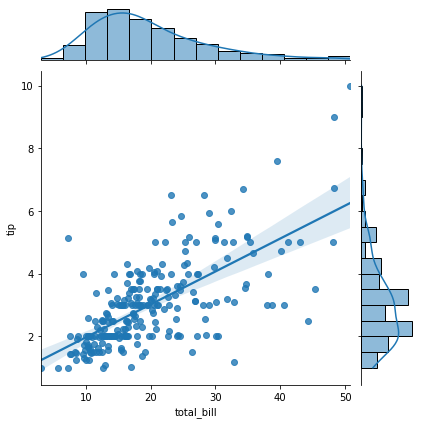

In [5]:
# O método joinplot cria plot de 2 variáveis com gráficos bivariados e univariados
sea.jointplot("total_bill", "tip", dados, kind = 'reg');

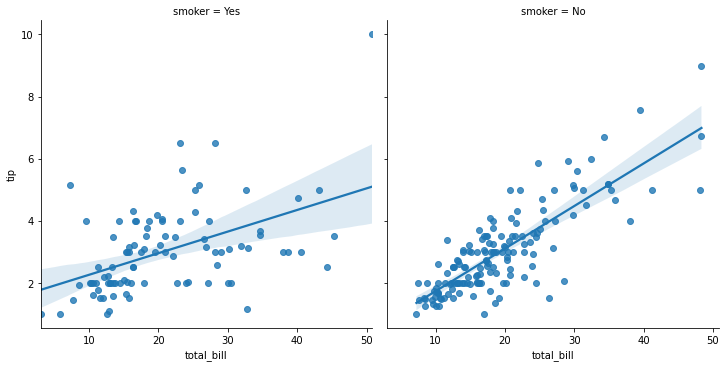

In [6]:
# O método lmplot() cria plot com dados e modelos de regressão.
sea.lmplot("total_bill", "tip", dados, col = "smoker");

In [7]:
# Construindo um dataframe com Pandas
df = pd.DataFrame()

In [8]:
# Alimentando o Dataframe com valores aleatórios
df['a'] = random.sample(range(1, 100), 25)
df['b'] = random.sample(range(1, 100), 25)

In [9]:
df.head()

,a,b
0,71,66
1,60,90
2,40,12
3,96,22
4,20,43


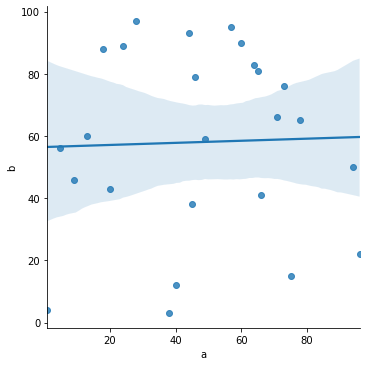

In [10]:
# Scatter Plot
sea.lmplot('a', 'b', data = df, fit_reg = True);

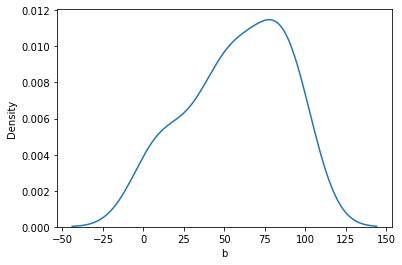

In [11]:
# Density Plot
sea.kdeplot(df.b);

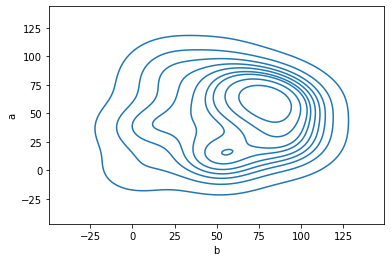

In [12]:
sea.kdeplot(df.b, df.a);

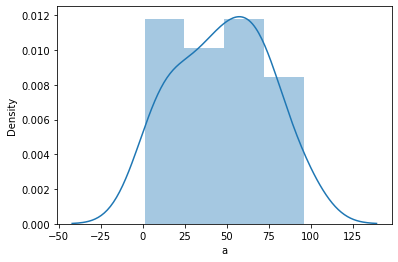

In [13]:
sea.distplot(df.a);

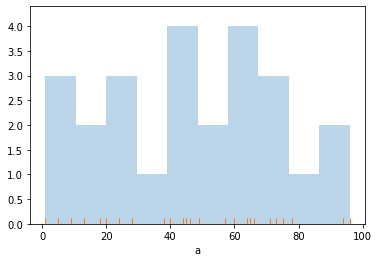

In [14]:
# Histograma
plt.hist(df.a, alpha = .3)
sea.rugplot(df.a);

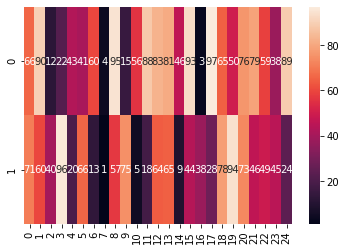

In [18]:
# Heatmap
sea.heatmap([df.b, df.a], annot = True, fmt = "d");

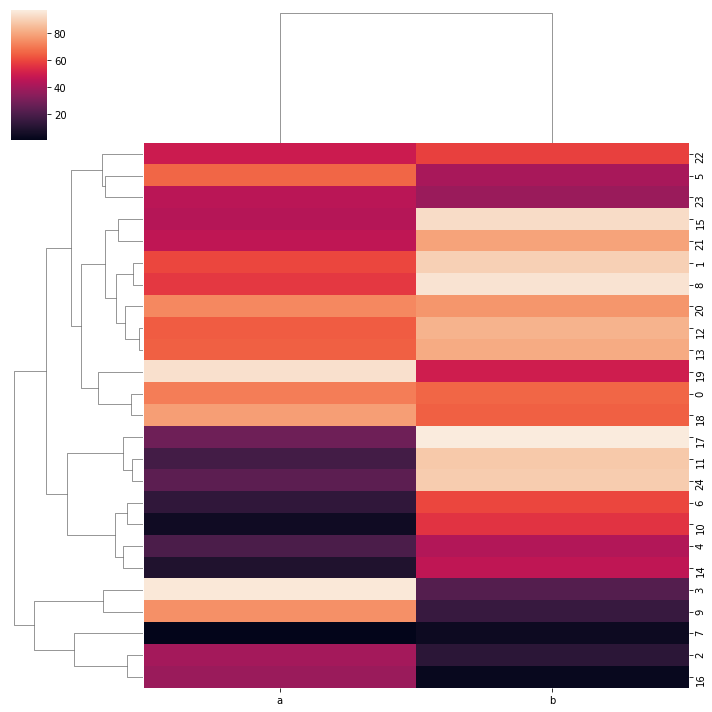

In [19]:
# Clustermap
sea.clustermap(df);

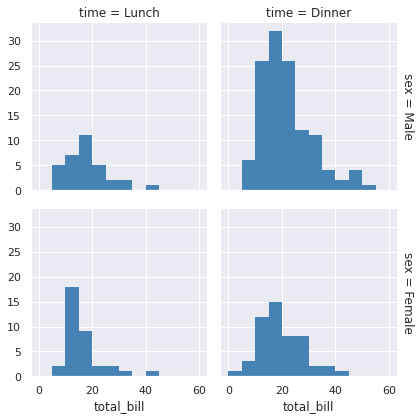

In [20]:
# Histogramas com subsets dos dados
sea.set(style = "darkgrid")

dados = sea.load_dataset("tips")
g = sea.FacetGrid(dados, row = "sex", col = "time", margin_titles = True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color = "steelblue", bins = bins, lw = 0);

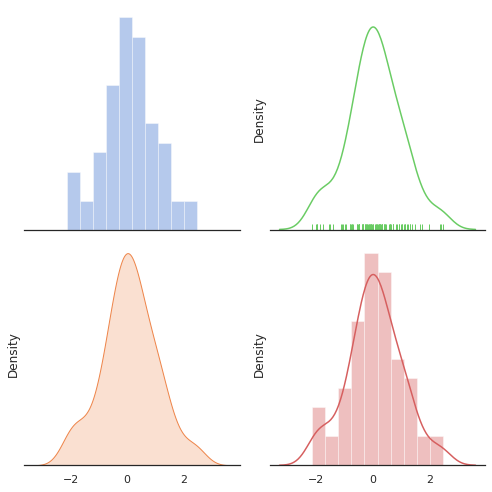

In [21]:
# Diversos plots simultâneos
sea.set(style = "white", palette = "muted")
f, axes = plt.subplots(2, 2, figsize = (7, 7), sharex = True)
sea.despine(left = True)

rs = np.random.RandomState(10)

b, g, r, p = sea.color_palette("muted", 4)

d = rs.normal(size = 100)

sea.distplot(d, kde = False, color = b, ax = axes[0, 0])
sea.distplot(d, hist = False, rug = True, color = r, ax = axes[0, 1])
sea.distplot(d, hist = False, color = g, kde_kws = {"shade": True}, ax = axes[1, 0])
sea.distplot(d, color = p, ax = axes[1, 1])

plt.setp(axes, yticks = [])
plt.tight_layout()

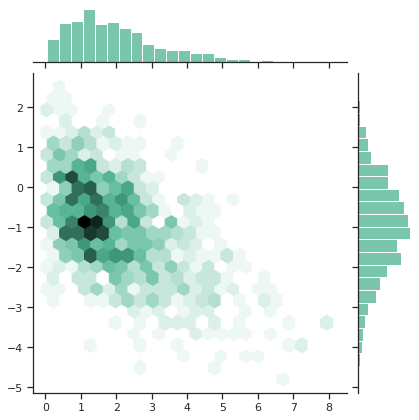

In [24]:
# Plot com distribuições marginais
from scipy.stats import kendalltau
sea.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size = 1000)
y = -.5 * x + rs.normal(size = 1000)
sea.jointplot(x, y, kind = "hex", color = "#4CB391");

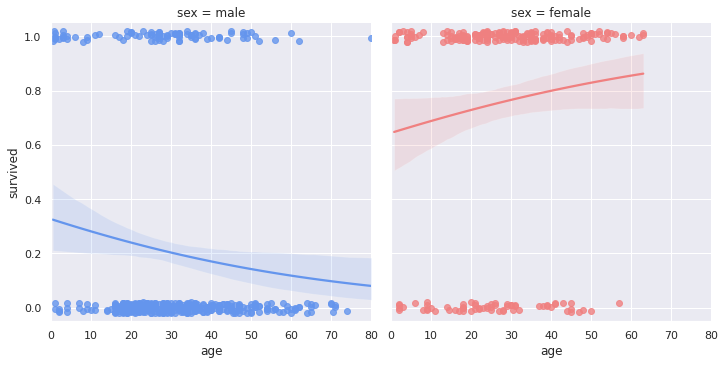

In [25]:
# Regressão Logística
sea.set(style = "darkgrid")
df = sea.load_dataset("titanic")

pal = dict(male = "#6495ED", female = "#F08080")
g = sea.lmplot("age", "survived", col = "sex", hue = "sex", data = df, palette = pal, 
               y_jitter = .02, logistic = True)
g.set(xlim=(0, 80), ylim = (-.05, 1.05));

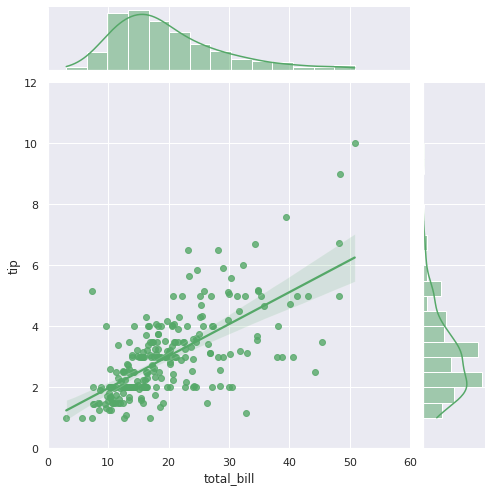

In [26]:
# Regressão Linear com Distribuições Marginais
sea.set(style = "darkgrid")
tips = sea.load_dataset("tips")
color = sea.color_palette()[2]
g = sea.jointplot("total_bill", "tip", data = tips, kind = "reg", xlim = (0, 60), 
                  ylim = (0, 12), color = color, size = 7);

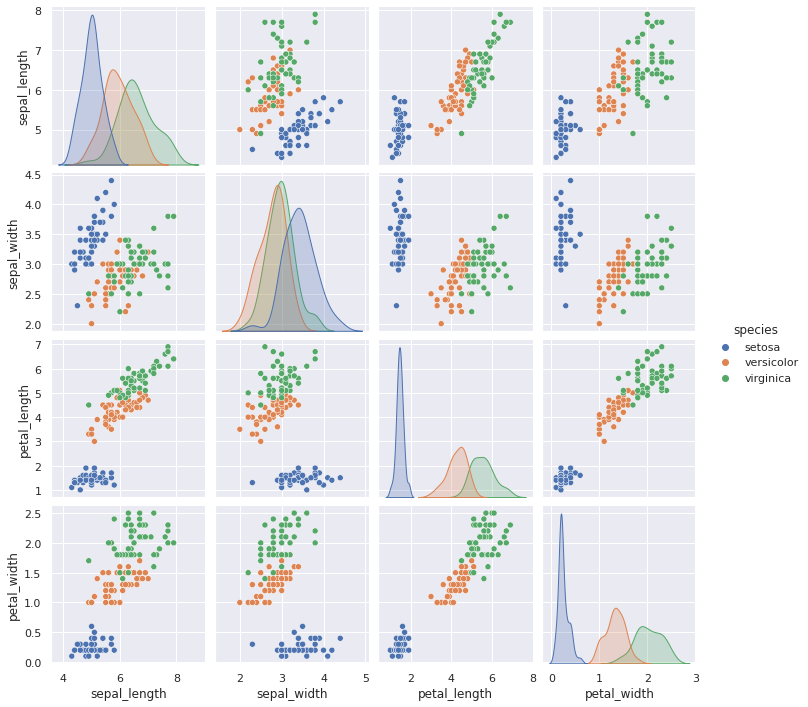

In [27]:
# Pair Plots
sea.set(style = "darkgrid")
df = sea.load_dataset("iris")
sea.pairplot(df, hue = "species", size = 2.5);